In [1]:
import sys
sys.path.insert(0, '.')
from utils import *

In [2]:
%run utils.py

In [3]:
olympic_running = pd.read_csv('/home/dba/rexport2/olympic_running.csv', parse_dates=['Year'])

In [4]:
olympic_running

,Year,Length,Sex,Time
0,1896-01-01,100,men,12.00
1,1900-01-01,100,men,11.00
2,1904-01-01,100,men,11.00
3,1908-01-01,100,men,10.80
4,1912-01-01,100,men,10.80
...,...,...,...,...
307,2000-01-01,10000,women,1817.49
308,2004-01-01,10000,women,1824.36
309,2008-01-01,10000,women,1794.66
310,2012-01-01,10000,women,1820.75


In [5]:
PBS = pd.read_csv('/home/dba/rexport2/PBS.csv', parse_dates=['Month'])

In [6]:
PBS

,Month,Concession,Type,ATC1,ATC1_desc,ATC2,ATC2_desc,Scripts,Cost
0,1991-07-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,18228,67877.0
1,1991-08-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15327,57011.0
2,1991-09-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14775,55020.0
3,1991-10-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,15380,57222.0
4,1991-11-01,Concessional,Co-payments,A,Alimentary tract and metabolism,A01,STOMATOLOGICAL PREPARATIONS,14371,52120.0
...,...,...,...,...,...,...,...,...,...
67591,2008-02-01,General,Safety net,Z,NaN,Z,Z,135,1591.0
67592,2008-03-01,General,Safety net,Z,NaN,Z,Z,15,276.0
67593,2008-04-01,General,Safety net,Z,NaN,Z,Z,11,165.0
67594,2008-05-01,General,Safety net,Z,NaN,Z,Z,21,278.0


In [7]:
olympic_running.Sex.unique()

array(['men', 'women'], dtype=object)

In [8]:
a10 = (
    PBS
    .query('ATC2 == "A10"')
    .groupby('Month', sort=False)
    .pipe(summarize, lambda x: dict(Cost = x.Cost.sum() / 1e6))
    .reset_index()
    .set_index('Month', drop=False)
)


In [9]:
a10

,Month,Cost
Month,,
1991-07-01,1991-07-01,3.526591
1991-08-01,1991-08-01,3.180891
1991-09-01,1991-09-01,3.252221
1991-10-01,1991-10-01,3.611003
1991-11-01,1991-11-01,3.565869
...,...,...
2008-02-01,2008-02-01,21.654285
2008-03-01,2008-03-01,18.264945
2008-04-01,2008-04-01,23.107677


In [10]:
PBSsub1 = PBS[["Month", "Concession", "Type", "Cost", "ATC2"]]

In [11]:
A10 = PBSsub1[(PBSsub1["ATC2"] == 'A10')]

In [12]:
A10

,Month,Concession,Type,Cost,ATC2
1524,1991-07-01,Concessional,Co-payments,2092878.0,A10
1525,1991-08-01,Concessional,Co-payments,1795733.0,A10
1526,1991-09-01,Concessional,Co-payments,1777231.0,A10
1527,1991-10-01,Concessional,Co-payments,1848507.0,A10
1528,1991-11-01,Concessional,Co-payments,1686458.0,A10
...,...,...,...,...,...
52339,2008-02-01,General,Safety net,530709.0,A10
52340,2008-03-01,General,Safety net,51773.0,A10
52341,2008-04-01,General,Safety net,36289.0,A10
52342,2008-05-01,General,Safety net,101233.0,A10


In [13]:
PBSsub2 = PBS[["Month", "Cost"]]
PBSsub2

,Month,Cost
0,1991-07-01,67877.0
1,1991-08-01,57011.0
2,1991-09-01,55020.0
3,1991-10-01,57222.0
4,1991-11-01,52120.0
...,...,...
67591,2008-02-01,1591.0
67592,2008-03-01,276.0
67593,2008-04-01,165.0
67594,2008-05-01,278.0


In [14]:
PBSsum = PBSsub2.groupby('Month') ['Cost'].sum()
PBSsum

Month
1991-07-01     90494401.0
1991-08-01     83068686.0
1991-09-01     87399990.0
1991-10-01     96884880.0
1991-11-01     93892910.0
                 ...     
2008-02-01    492885220.0
2008-03-01    415560360.0
2008-04-01    518553863.0
2008-05-01    507645174.0
2008-06-01    429030845.0
Name: Cost, Length: 204, dtype: float64

In [15]:
A10sum = A10.groupby('Month')['Cost'].sum()
A10sum

Month
1991-07-01     3526591.0
1991-08-01     3180891.0
1991-09-01     3252221.0
1991-10-01     3611003.0
1991-11-01     3565869.0
                 ...    
2008-02-01    21654285.0
2008-03-01    18264945.0
2008-04-01    23107677.0
2008-05-01    22912510.0
2008-06-01    19431740.0
Name: Cost, Length: 204, dtype: float64

In [16]:
A10mils = A10.groupby('Month').apply (lambda x: x['Cost'].sum()/1000000)
A10mils

Month
1991-07-01     3.526591
1991-08-01     3.180891
1991-09-01     3.252221
1991-10-01     3.611003
1991-11-01     3.565869
                ...    
2008-02-01    21.654285
2008-03-01    18.264945
2008-04-01    23.107677
2008-05-01    22.912510
2008-06-01    19.431740
Length: 204, dtype: float64

In [17]:
pd.read_csv('~/rexport2/ansett.csv').head(3)

,Week,Airports,Class,Passengers
0,1989 W28,ADL-PER,Business,193
1,1989 W29,ADL-PER,Business,254
2,1989 W30,ADL-PER,Business,185


In [18]:
def ansett_parse_week(week):
    y = int(week[:4])
    w = int(week[-2:])
    return pd.to_datetime(y, format='%Y') + pd.to_timedelta(w, 'w')

In [19]:
ansett = pd.read_csv('~/rexport2/ansett.csv',
                     parse_dates=['Week'], date_parser=ansett_parse_week)
ansett

,Week,Airports,Class,Passengers
0,1989-07-16,ADL-PER,Business,193
1,1989-07-23,ADL-PER,Business,254
2,1989-07-30,ADL-PER,Business,185
3,1989-08-06,ADL-PER,Business,254
4,1989-08-13,ADL-PER,Business,191
...,...,...,...,...
7402,1992-10-28,SYD-PER,First,203
7403,1992-11-04,SYD-PER,First,137
7404,1992-11-11,SYD-PER,First,161
7405,1992-11-18,SYD-PER,First,155


In [20]:
melsyd_economy = ansett.query("Airports == 'MEL-SYD' and Class == 'Economy'")
melsyd_economy

,Week,Airports,Class,Passengers
3881,1987-07-02,MEL-SYD,Economy,20167
3882,1987-07-09,MEL-SYD,Economy,20161
3883,1987-07-16,MEL-SYD,Economy,19993
3884,1987-07-23,MEL-SYD,Economy,20986
3885,1987-07-30,MEL-SYD,Economy,20497
...,...,...,...,...
4158,1992-10-28,MEL-SYD,Economy,28837
4159,1992-11-04,MEL-SYD,Economy,26548
4160,1992-11-11,MEL-SYD,Economy,27279
4161,1992-11-18,MEL-SYD,Economy,27306


(array([6209., 6574., 6940., 7305., 7670., 8035., 8401.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

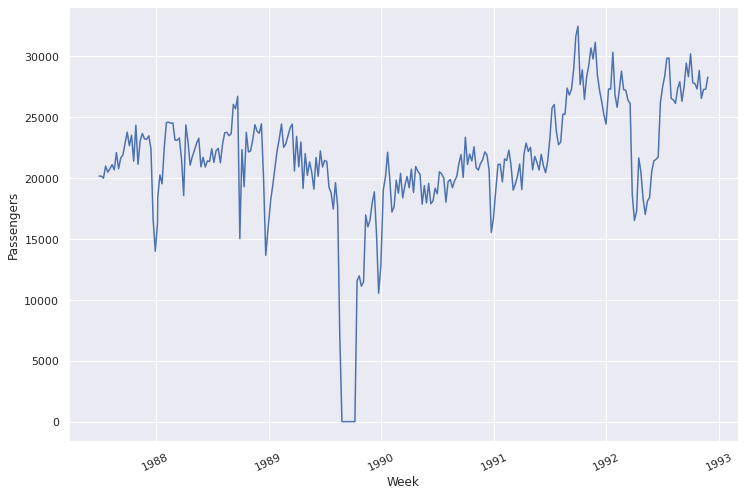

In [22]:
import seaborn as sns
time_series=melsyd_economy['Week']
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x = "Week", y = "Passengers",
             data = melsyd_economy)
plt.xticks(rotation = 25)

(array([ 7305.,  8035.,  8766.,  9496., 10227., 10957., 11688., 12418.,
        13149., 13879., 14610.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

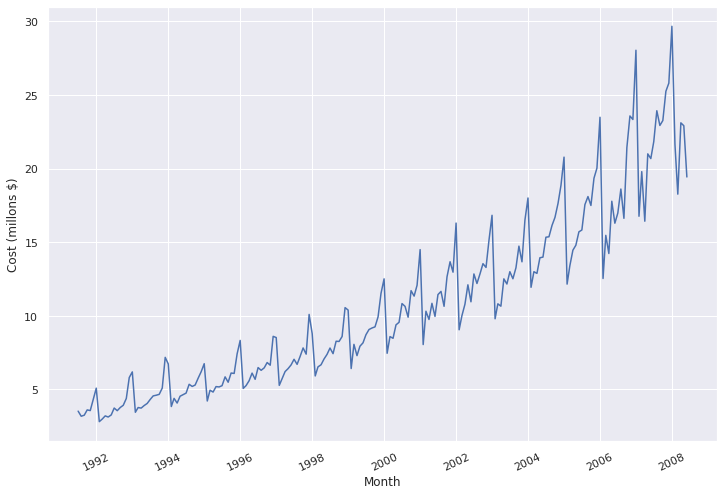

In [48]:
a10_time=a10['Month']
ax = sns.lineplot(x = 'Month', y = 'Cost',
        data = a10)
ax.set(ylabel='Cost (millons $)')
plt.xticks(rotation = 25)

In [54]:
def seasonalize(data, column, period='year'):
    if period.lower() in ('year', 'y'):
        d = data.assign(
            __period = data.index.year,
            __x = data.index.dayofyear)
    elif period.lower() in ('week', 'w'):
        d = data.assign(
            __period = 100*data.index.year + data.index.week,
            __x = data.index.dayofweek
                + (data.index.hour + data.index.minute/60 + data.index.second/3600) / 24)
    elif period.lower() in ('day', 'd'):
        d = data.assign(
            __period = data.index.date,
            __x = data.index.hour + data.index.minute/60 + data.index.second/3600)
    d = (
        d
        .sort_values('__x')
        .groupby('__period')
        .pipe(summarize, lambda x: {'time': list(x.__x), column: list(x[column])})
    )
    return d

def plot_seasonal(
        data, column,
        period='year',
        cmap='viridis',
        labels='',
        figsize=None,
        ax=None,
        **kw):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig, ax = ax.figure, ax
    d = seasonalize(data, column, period)
    cm = plt.get_cmap(cmap)
    for (i, p) in enumerate(d.index):
        color = cm(i / len(d))
        x, y = d.time.loc[p], d[column].loc[p]
        ax.plot(x, y, color=color, label=str(p), **kw)
        if labels in 'right both'.split():
            ax.text(x[-1], y[-1], str(p), color=color, ha='center', va='center')
        if labels in 'left both'.split():
            ax.text(x[0], y[0], str(p), color=color, ha='center', va='center')
    return ax

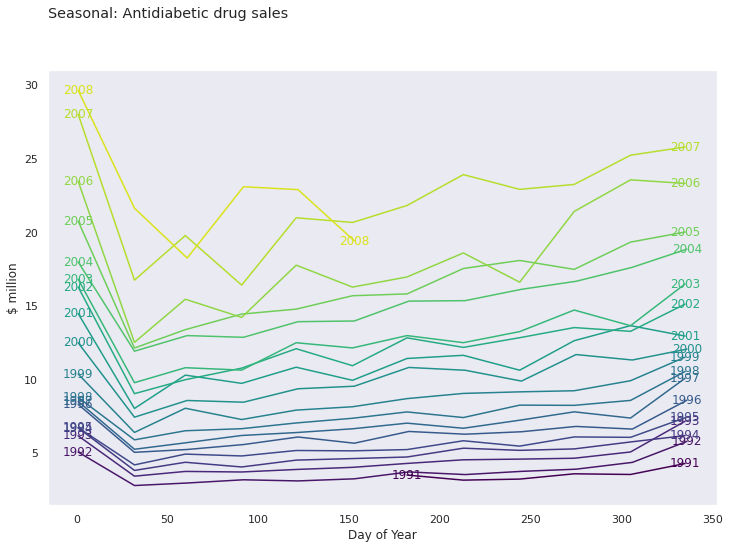

In [55]:
ax = plot_seasonal(a10, 'Cost', labels='both', figsize=(12,8))
suptitle('Seasonal: Antidiabetic drug sales')
ax.set(xlabel='Day of Year', ylabel='$ million')
ax.grid()

In [57]:
vic_elec = (
    pd.read_csv('~/rexport2/vic_elec.csv')
    .pipe(compute, lambda x: dict(Time = pd.to_datetime(x.Time)))
    .set_index('Time')
)

CPU times: user 1.58 s, sys: 10.7 ms, total: 1.59 s
Wall time: 1.58 s


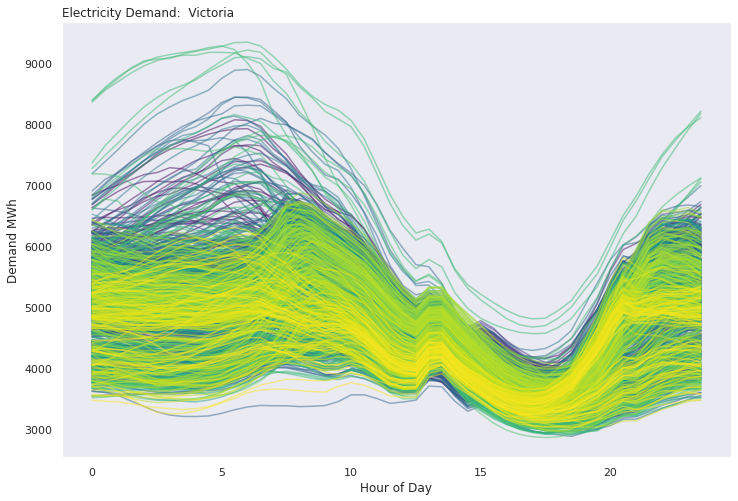

In [60]:
%%time
ax = plot_seasonal(vic_elec, 'Demand', period='d', alpha=.5, figsize=(12,8))
ax.set(xlabel='Hour of Day', ylabel='Demand MWh', title='Electricity Demand:  Victoria')
ax.grid()

/tmp/ipykernel_10244/484420594.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  __period = 100*data.index.year + data.index.week,


CPU times: user 345 ms, sys: 10.9 ms, total: 356 ms
Wall time: 354 ms


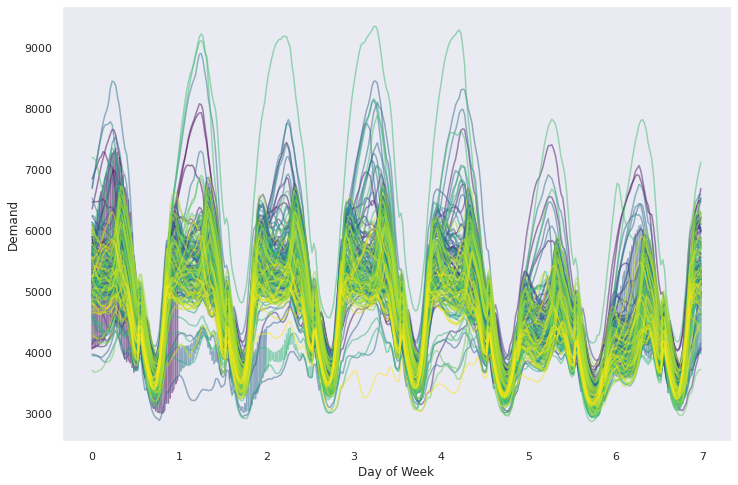

In [62]:
%%time
ax = plot_seasonal(vic_elec, 'Demand', period='w', alpha=.5, figsize=(12,8))
ax.set(xlabel='Day of Week', ylabel='Demand')
ax.grid()

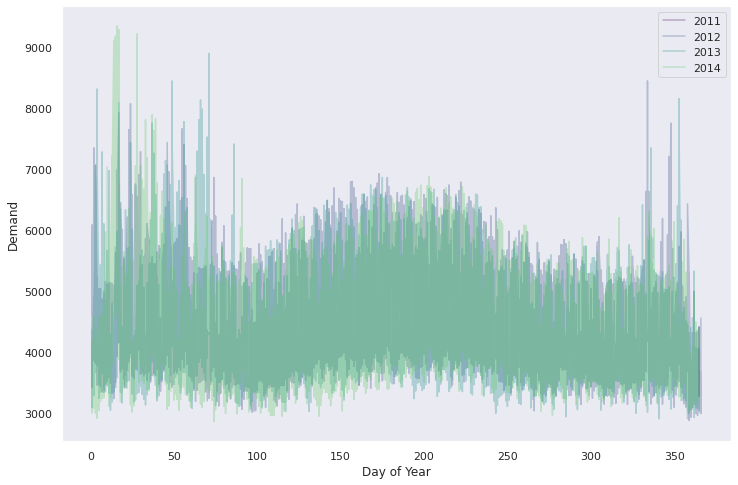

In [63]:
ax = plot_seasonal(vic_elec, 'Demand', period='y', alpha=.3, figsize=(12,8))
ax.legend()
ax.set(xlabel='Day of Year', ylabel='Demand')
ax.grid()